# TASK 1: Time Series Analysis 

## Step 1:Import Required Libraries

- These libraries are required for: Pandas,sklearn,matplotlib,numpy,ARIMA

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np


## Step 2: Load Dataset

- Confirms dataset is loaded correctly.

In [58]:
df = pd.read_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-6\Task-1\Dataset\Sales_Data.csv")
df.head()


,Date,Gender,Age,Product Category,Quantity,Sales,Total Amount
0,24-11-2023,Male,34,Beauty,3,50,150
1,27-02-2023,Female,26,Clothing,2,500,1000
2,13-01-2023,Male,50,Electronics,1,30,30
3,21-05-2023,Male,37,Clothing,1,500,500
4,06-05-2023,Male,30,Beauty,2,50,100


# Step 3: Convert Date Column

- Converts the Date column into datetime format.
- Required for time series analysis.

In [59]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


# Step 4: Sort by Date

- Sorts records in chronological order.
- ARIMA requires ordered time data.

In [60]:
df = df.sort_values('Date')


# Step 5: Display Data

- Displays the first 5 rows of the dataset.

In [61]:
df.head()


,Date,Gender,Age,Product Category,Quantity,Sales,Total Amount
521,2023-01-01,Male,46,Beauty,3,500,1500
179,2023-01-01,Male,41,Clothing,3,300,900
558,2023-01-01,Female,40,Clothing,4,300,1200
302,2023-01-02,Male,19,Electronics,3,30,90
978,2023-01-02,Female,19,Beauty,1,25,25


# Step 6: Plot Sales Trend

- plt.figure() → Creates a new plot window
- plt.plot() → Draws line chart of sales vs date
- plt.xlabel() → Labels X-axis
- plt.ylabel() → Labels Y-axis
- plt.title() → Sets chart title
- plt.show() → Displays the graph

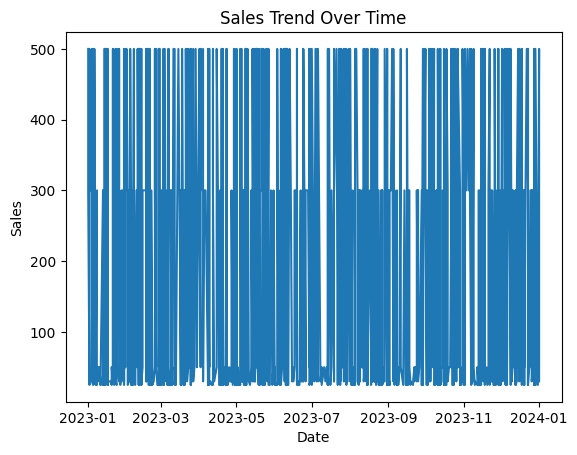

In [62]:
plt.figure()
plt.plot(df['Date'], df['Sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.show()


# Step 7: ARIMA Model Training and Forecast Future Sales

- (1,1,1) means:
    - AR = 1
    - Differencing = 1
    - MA = 1
- fit() trains the model on sales data.
- Predicts sales for the next 10 future time periods.

In [63]:
df['Sales'] = df['Sales'].ffill()

model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=10)
forecast


C:\Users\ARJUN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\ARJUN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\ARJUN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

1000    182.299149
1001    179.842995
1002    179.882606
1003    179.881967
1004    179.881977
1005    179.881977
1006    179.881977
1007    179.881977
1008    179.881977
1009    179.881977
Name: predicted_mean, dtype: float64

# Step 9: RMSE Calculation

- Splits data into training and testing
- Compares predicted vs actual sales
- RMSE shows prediction error

In [64]:
train = df['Sales'][:-10]
test = df['Sales'][-10:]
pred = model_fit.forecast(steps=10)
rmse = np.sqrt(mean_squared_error(test, pred))
rmse


C:\Users\ARJUN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ARJUN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


np.float64(213.4200999575127)